
Accuracy score:  0.9210526315789473

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


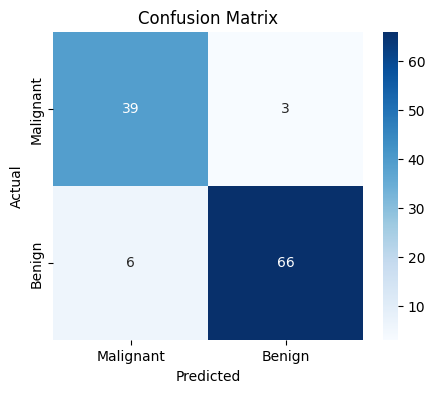

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#-----------------------------------------DATA-------------------------------------------------#

#1. Load Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target # 0 = malignant, 1 = benign

#keep only 5 important features + target
df_small = df[["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "target"]]

#2. Split Dataset
x = df_small.drop(columns=["target"])
y = df_small["target"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

#-------------------------------------------------MODEL CREATION---------------------------------#
#3. Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# 4. Evaluation
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]
print("\nAccuracy score: ",accuracy_score(y_test,y_pred))
print("\n Classification Report: \n", classification_report(y_test,y_pred))
#---------------------------------------------EVALUATION------------------------------------------#
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,cmap="Blues",annot=True,
            xticklabels=["Malignant","Benign"], yticklabels=["Malignant","Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#------------------------------------------------PREDICTION---------------------------------

# 5. User Input Prediction
# print("\n--- Breast Cancer Prediction ---")

# mean_radius = float(input("Enter mean radius (e.g. 14.5): "))
# mean_texture = float(input("Enter mean texture (e.g. 20.0): "))
# mean_perimeter = float(input("Enter mean perimeter (e.g. 100.0): "))
# mean_area = float(input("Enter mean area (e.g. 900.0): "))
# mean_smoothness = float(input("Enter mean smoothness (e.g. 0.1): "))

# # Create DataFrame for user input
# user_data = {
#     "mean radius": mean_radius,
#     "mean texture": mean_texture,
#     "mean perimeter": mean_perimeter,
#     "mean area": mean_area,
#     "mean smoothness": mean_smoothness
# }
# user_df = pd.DataFrame([user_data])

# # Predict
# prediction = model.predict(user_df)[0]

# if prediction == 1:
#     print(f"\n Prediction: Benign (Not Cancerous) ")
# else:
#     print(f"\nPrediction: Malignant (Cancerous) ")
